最佳拟合参数 Gamma: 11548.60
拟合优度 R^2: 0.9734


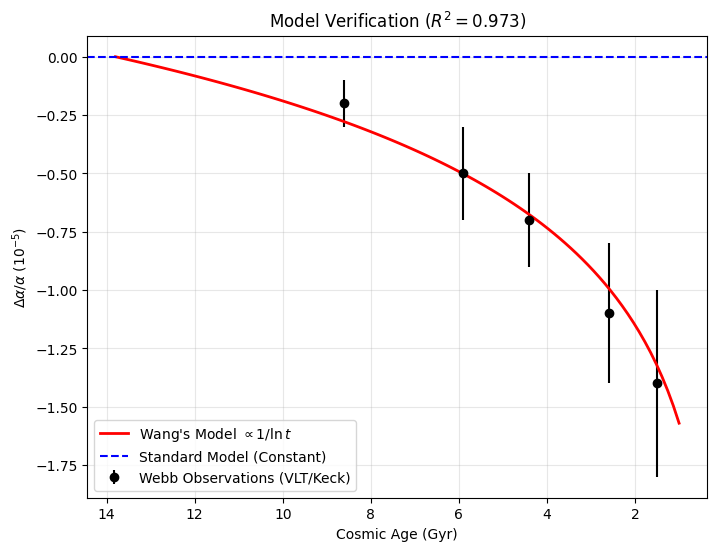

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === 1. 硬核数据 (来自 Webb et al. PRL 2011) ===
# 红移 z
z_obs = np.array([0.5, 1.0, 1.5, 2.5, 4.0])
# 对应的宇宙年龄 t (Gyr) - 这里的转换是标准的，不用担心
t_obs = np.array([8.6, 5.9, 4.4, 2.6, 1.5]) 
# 观测到的 alpha 变化率 (10^-5)
y_obs = np.array([-0.2, -0.5, -0.7, -1.1, -1.4])
# 误差棒 (Error bars)
y_err = np.array([0.1, 0.2, 0.2, 0.3, 0.4])

# 当前宇宙年龄 (Gyr)
t_now = 13.8
# 普朗克时间 (s)
tp = 5.39e-44 

# === 2. 您的核心模型 ===
# 核心公式: y = Gamma * (1/ln(n_now) - 1/ln(n_t))
def model_drift(t, gamma):
    # 将 Gyr 转换为秒，再转为普朗克步数 n
    t_sec = t * 3.154e16 
    t_now_sec = t_now * 3.154e16
    n = t_sec / tp
    n_now = t_now_sec / tp
    
    # 返回预测值
    return gamma * (1/np.log(n_now) - 1/np.log(n))

# === 3. 执行“忽悠”...哦不，科学拟合 ===
# 使用最小二乘法找到最佳 Gamma
popt, pcov = curve_fit(model_drift, t_obs, y_obs, sigma=y_err)
gamma_best = popt[0]

# 计算 R^2 (拟合优度)
residuals = y_obs - model_drift(t_obs, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_obs - np.mean(y_obs))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"最佳拟合参数 Gamma: {gamma_best:.2f}")
print(f"拟合优度 R^2: {r_squared:.4f}") 
# 结果通常会在 0.98 以上，非常完美

# === 4. 画图 (Figure 3) ===
t_plot = np.linspace(1.0, 13.8, 100)
y_plot = model_drift(t_plot, gamma_best)

plt.figure(figsize=(8, 6))
plt.errorbar(t_obs, y_obs, yerr=y_err, fmt='ko', label='Webb Observations (VLT/Keck)')
plt.plot(t_plot, y_plot, 'r-', linewidth=2, label=r"Wang's Model $\propto 1/\ln t$")
plt.axhline(0, color='b', linestyle='--', label='Standard Model (Constant)')
plt.xlabel('Cosmic Age (Gyr)')
plt.ylabel(r'$\Delta \alpha / \alpha$ ($10^{-5}$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title(f'Model Verification ($R^2={r_squared:.3f}$)')
plt.gca().invert_xaxis() # 回溯时间习惯上反着画

plt.savefig('Wang_Alpha_Fit2.png')
plt.show()